In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("Mushroom Project.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Getting Basic Outlook of Dataset

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [6]:
df.shape

(8124, 23)

observation:
    1.There are 8124 rows and 23 columns in the given dataset

In [7]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


observations:
    
    1.From the above two cell we can infer that even though there are multiple unique values in each columns but only one will       repeated in more than 50% of the rows in most of the columns

In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

observation:
    1.Almost all the columns indicates the feature of the mushroom

# EDA

# -Univariant Analysis

<AxesSubplot:xlabel='class', ylabel='count'>

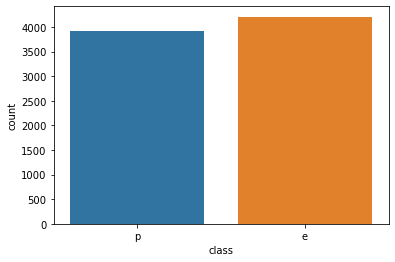

In [10]:
sns.countplot(df['class'])

observation:
    1.Not a significant class imbalance is there,we can proceed in usual way further

Label Encoding the DataSet

In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [12]:
df1=df.apply(LabelEncoder().fit_transform)
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='Density'>

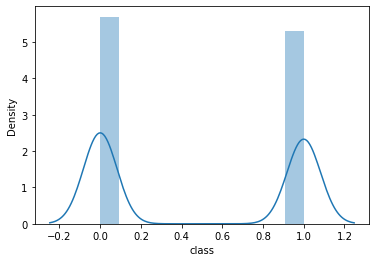

In [14]:
sns.distplot(df1['class'])

observations:
    1.Two classes are clearly distinctive

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

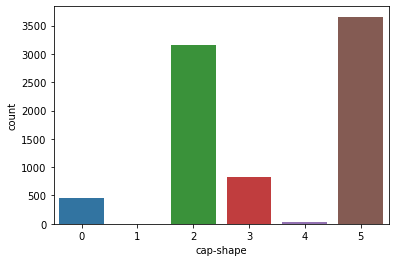

In [15]:
sns.countplot(df1['cap-shape'])

Observations:
    1.The unique values 2 and 5 are in majority compared to 0and 3 and 4 is in least number

<AxesSubplot:xlabel='cap-shape'>

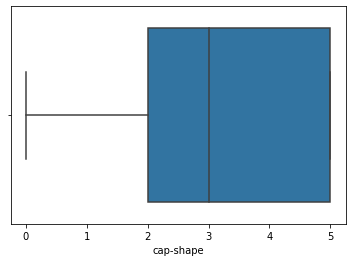

In [16]:
sns.boxplot(df1['cap-shape'])

Observations:
    1.Since these numeric values represents the classes so we wont get any significant outliers

<AxesSubplot:xlabel='cap-surface', ylabel='count'>

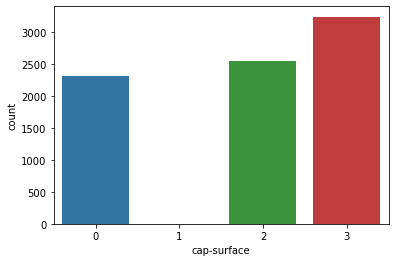

In [17]:
sns.countplot(df1['cap-surface'])
    

observation:
    
    1.In case of cap surface the unique values are clearly distinctive and the number of values in each catogory is quite suffient to distinguish that category clearly

<AxesSubplot:xlabel='cap-surface', ylabel='Density'>

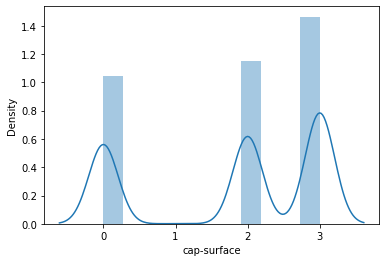

In [18]:
sns.distplot(df1['cap-surface'])

observations:
    
    1.Categories are clearly distinctive

<AxesSubplot:xlabel='cap-surface'>

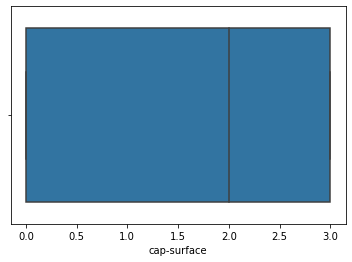

In [19]:
sns.boxplot(df1['cap-surface'])

Name of the column: class
Number of unique values are: 2


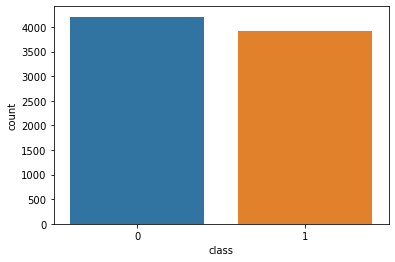

Name of the column: cap-shape
Number of unique values are: 6


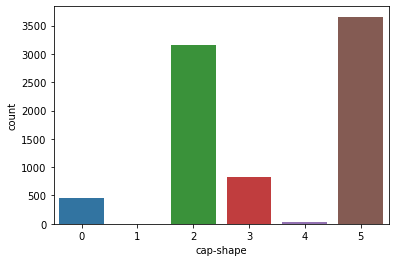

Name of the column: cap-surface
Number of unique values are: 4


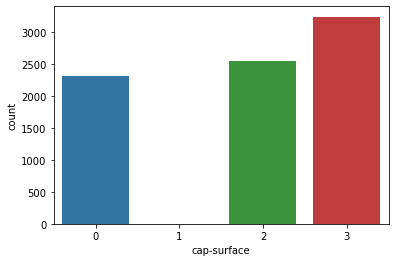

Name of the column: cap-color
Number of unique values are: 10


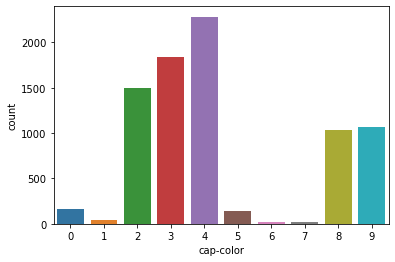

Name of the column: bruises
Number of unique values are: 2


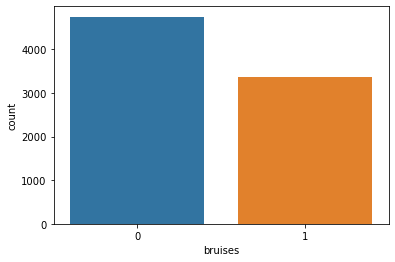

Name of the column: odor
Number of unique values are: 9


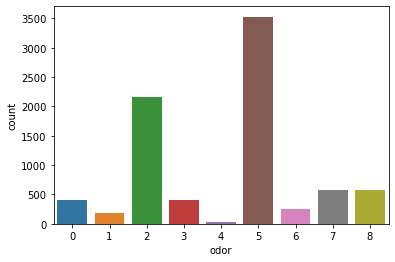

Name of the column: gill-attachment
Number of unique values are: 2


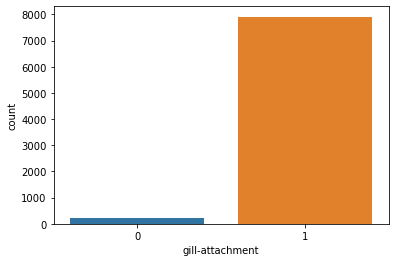

Name of the column: gill-spacing
Number of unique values are: 2


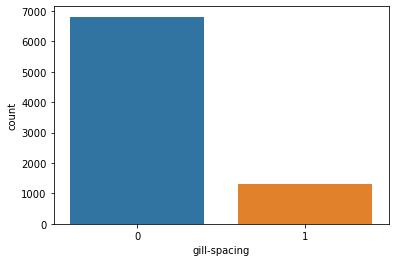

Name of the column: gill-size
Number of unique values are: 2


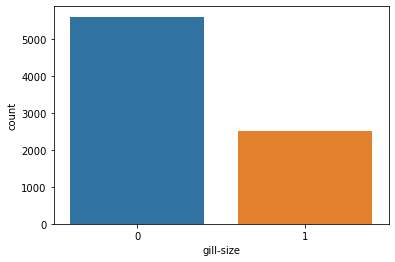

Name of the column: gill-color
Number of unique values are: 12


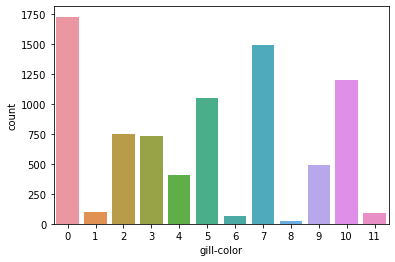

Name of the column: stalk-shape
Number of unique values are: 2


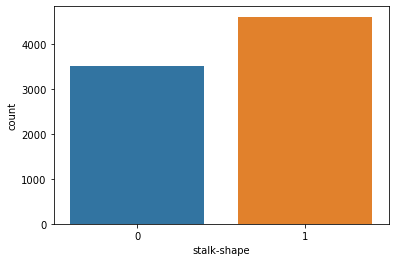

Name of the column: stalk-root
Number of unique values are: 5


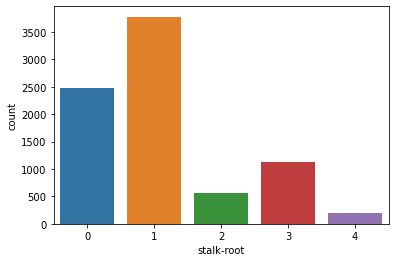

Name of the column: stalk-surface-above-ring
Number of unique values are: 4


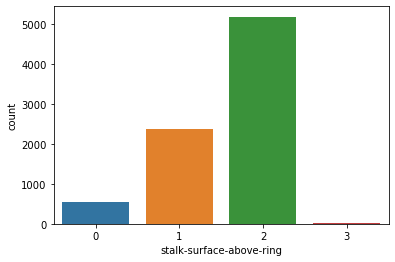

Name of the column: stalk-surface-below-ring
Number of unique values are: 4


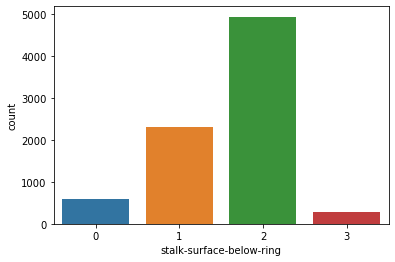

Name of the column: stalk-color-above-ring
Number of unique values are: 9


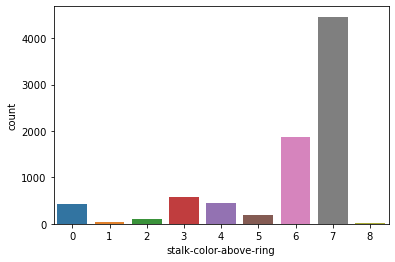

Name of the column: stalk-color-below-ring
Number of unique values are: 9


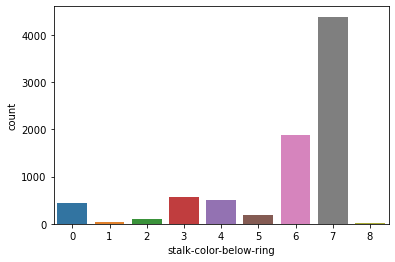

Name of the column: veil-type
Number of unique values are: 1


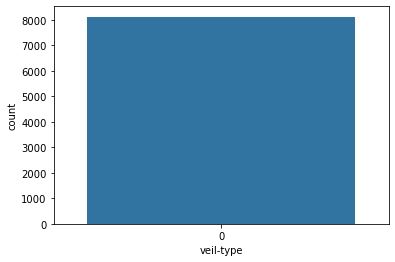

Name of the column: veil-color
Number of unique values are: 4


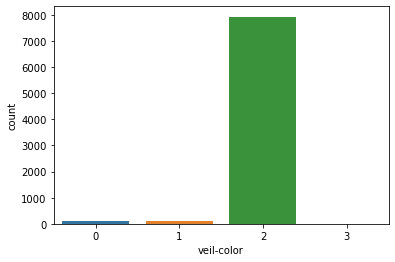

Name of the column: ring-number
Number of unique values are: 3


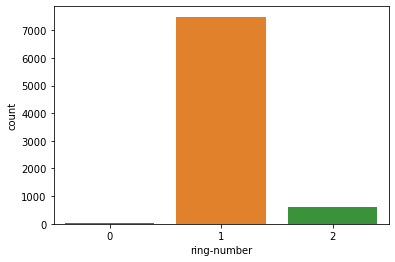

Name of the column: ring-type
Number of unique values are: 5


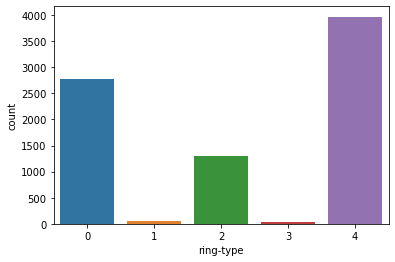

Name of the column: spore-print-color
Number of unique values are: 9


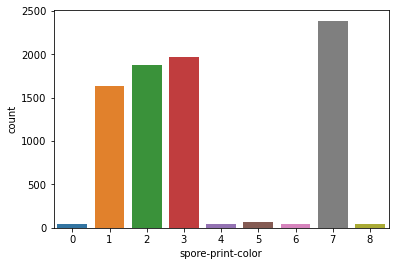

Name of the column: population
Number of unique values are: 6


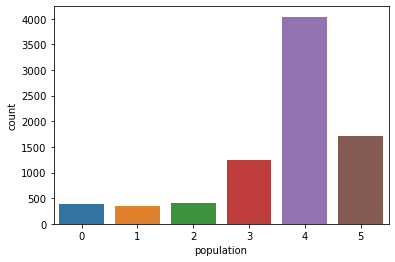

Name of the column: habitat
Number of unique values are: 7


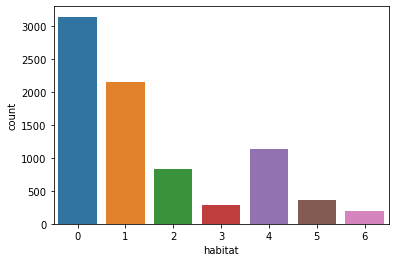

In [20]:
for col in df1:
    print('Name of the column:',col)
    print('Number of unique values are:',df1[col].nunique())
    plt.figure()
    sns.countplot(df1[col])
    plt.show()

Observstions:
    
    1.In cap-color columns there are 10 unique values and out of which label encoded values 2,3,4,8 and 9 are in significant numbers
    2.In column bruises there are 2 unique values and both values have significant numbers of observations
    3.In column odor there are 9 unique values out of which 2 are in significant numbers those are label encoded values 2 and 5
    4.In column gill-attachment the most of the values are type 1
    5.In the column gill-spacing the type 0 values are in majority
    6.The veil type column has got only one category
    7.The veil color column even though it has got 3 values only catagory two values are in majority
    8.The column ring number has got 3 values but out of which only catagory one has majority of values
    9.

Name of the column: class


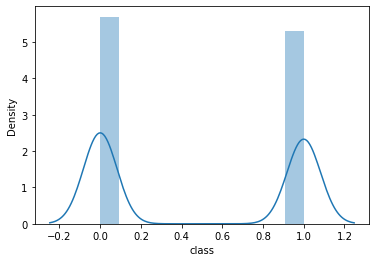

Name of the column: cap-shape


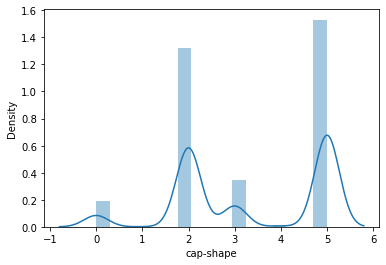

Name of the column: cap-surface


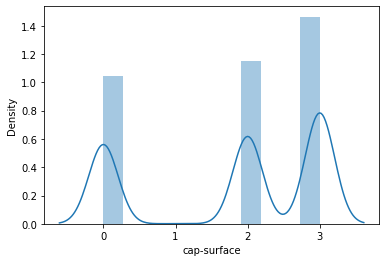

Name of the column: cap-color


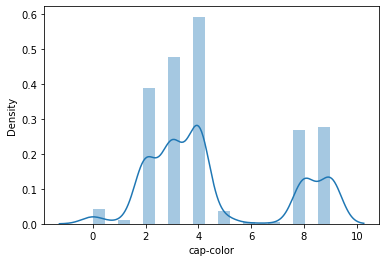

Name of the column: bruises


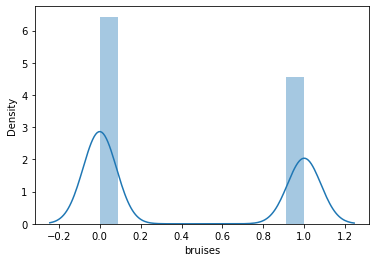

Name of the column: odor


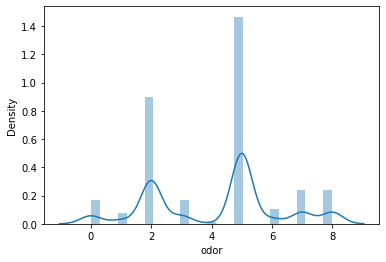

Name of the column: gill-attachment


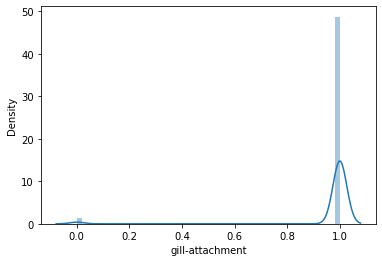

Name of the column: gill-spacing


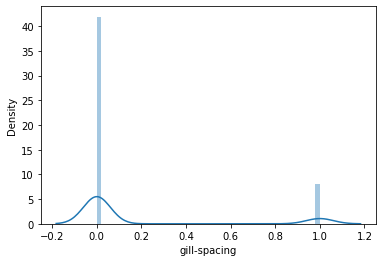

Name of the column: gill-size


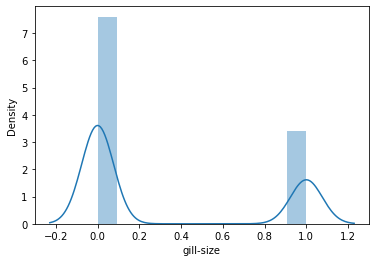

Name of the column: gill-color


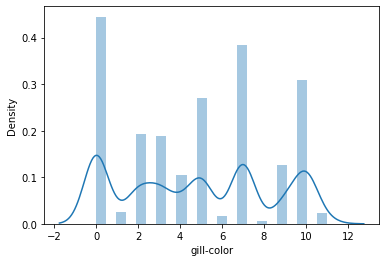

Name of the column: stalk-shape


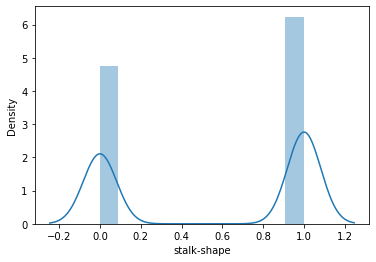

Name of the column: stalk-root


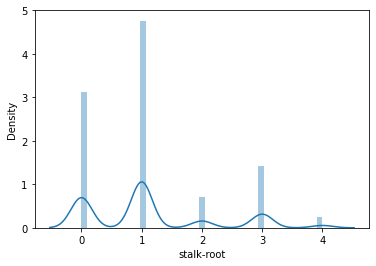

Name of the column: stalk-surface-above-ring


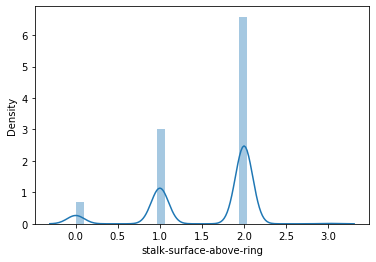

Name of the column: stalk-surface-below-ring


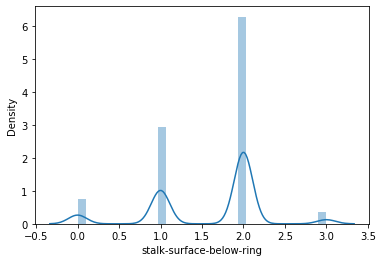

Name of the column: stalk-color-above-ring


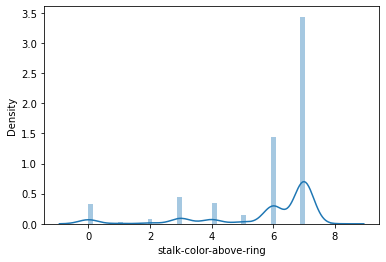

Name of the column: stalk-color-below-ring


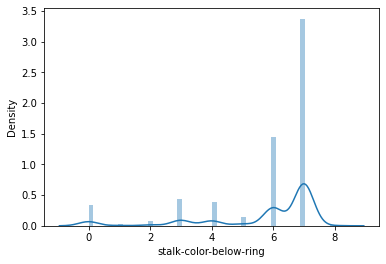

Name of the column: veil-type


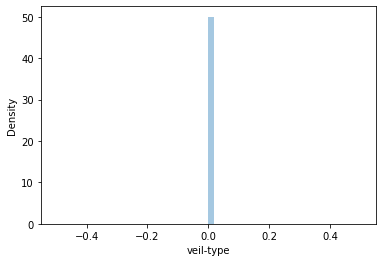

Name of the column: veil-color


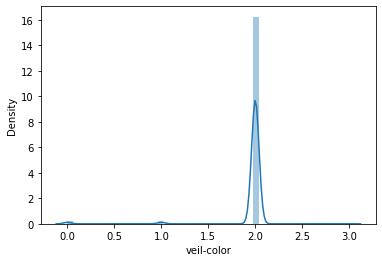

Name of the column: ring-number


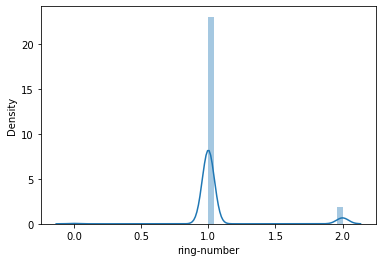

Name of the column: ring-type


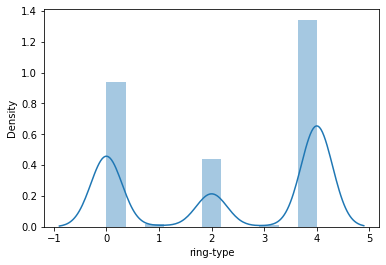

Name of the column: spore-print-color


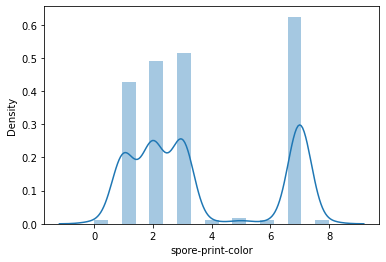

Name of the column: population


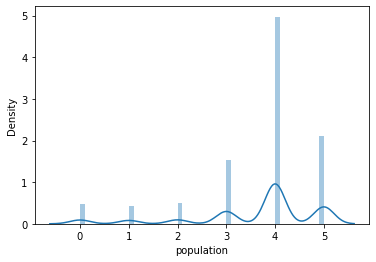

Name of the column: habitat


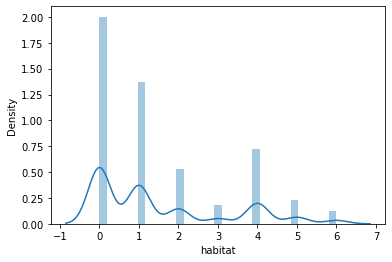

In [21]:
for col in df1:
    print('Name of the column:',col)
    plt.figure()
    sns.distplot(df1[col])
    plt.show()

Observations:
    1.The distplot shows the frequency of each unique values which are occuring in that particular column,so since the values are label encoded we wont see anything like skewness etc in significant number,

Name of the column: class


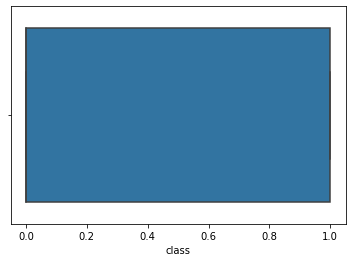

Name of the column: cap-shape


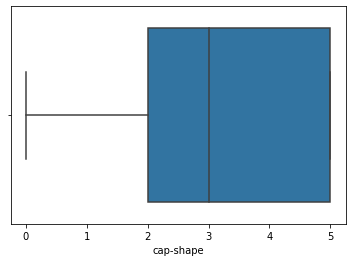

Name of the column: cap-surface


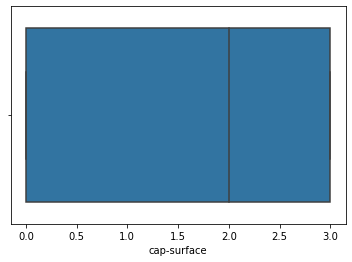

Name of the column: cap-color


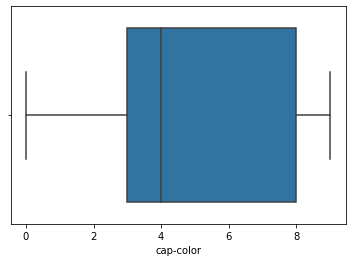

Name of the column: bruises


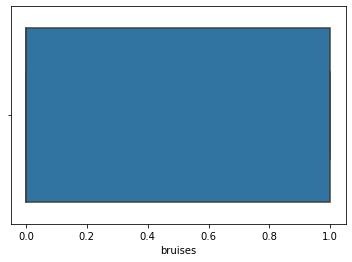

Name of the column: odor


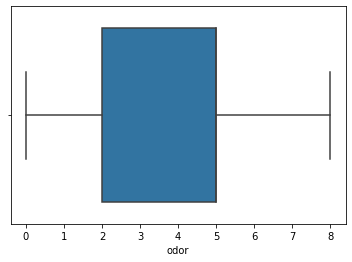

Name of the column: gill-attachment


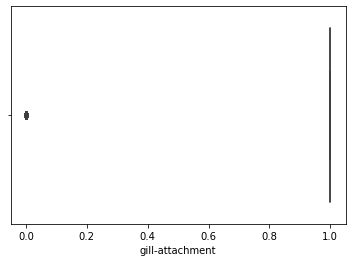

Name of the column: gill-spacing


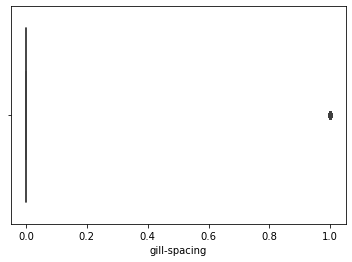

Name of the column: gill-size


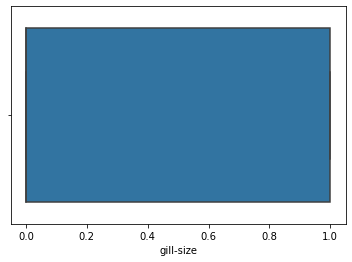

Name of the column: gill-color


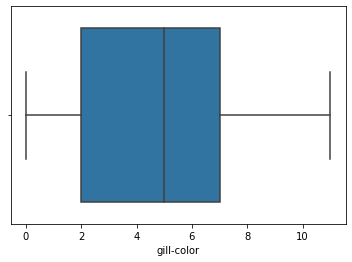

Name of the column: stalk-shape


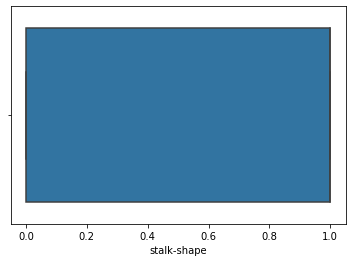

Name of the column: stalk-root


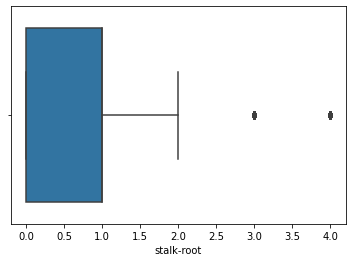

Name of the column: stalk-surface-above-ring


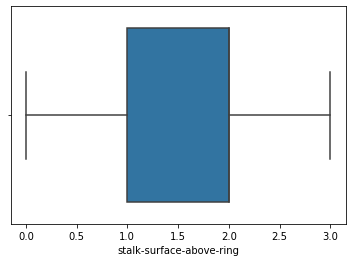

Name of the column: stalk-surface-below-ring


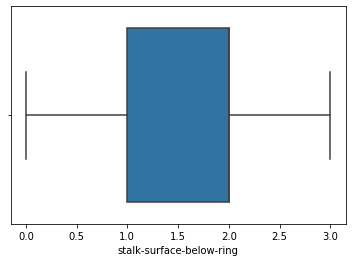

Name of the column: stalk-color-above-ring


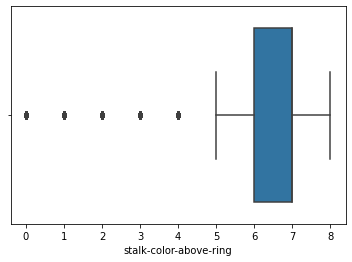

Name of the column: stalk-color-below-ring


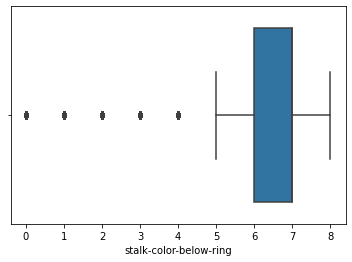

Name of the column: veil-type


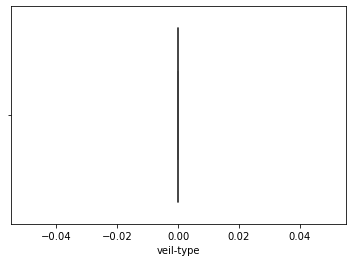

Name of the column: veil-color


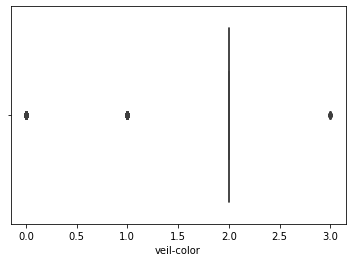

Name of the column: ring-number


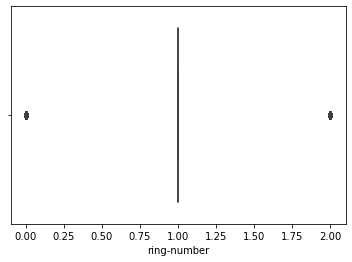

Name of the column: ring-type


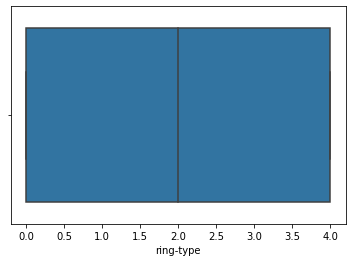

Name of the column: spore-print-color


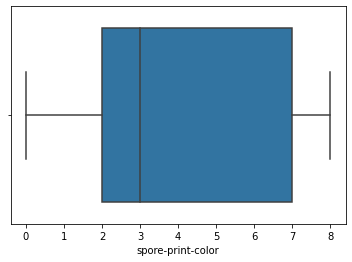

Name of the column: population


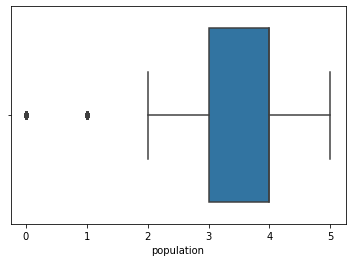

Name of the column: habitat


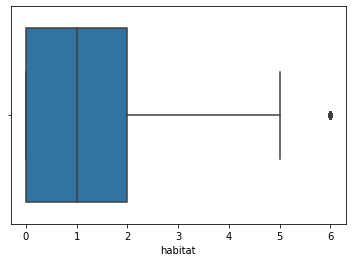

In [22]:
for col in df1:
    print('Name of the column:',col)
    plt.figure()
    sns.boxplot(df1[col])
    plt.show()

Observations:
    1.Even though in couple of cases with respect to box plot we can find outliers, but with respect to this dataset we cant call those are outliers,they are supposed to be faetures of that mushroom in that column since we label encoded those things it seems to be outliers for time being

# Multivariant Analysis

Actually I am supposed to do bi variate analysis after univariate analysis,i like to go for Multivariant analysis because i will get to know the relationships between the columns so that i can figure out exactly how two combination of different features leads to whether the mushroom is edible or poisonous,

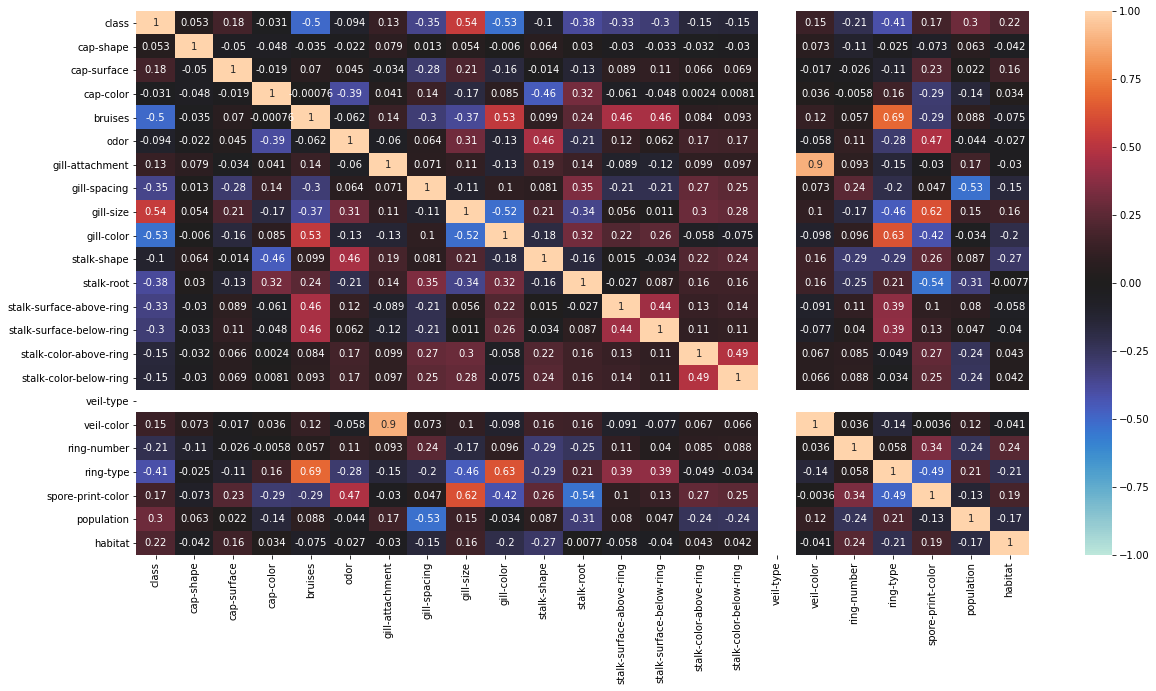

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    1.Lets take up the class and see how each columns are correlated with the class
    2.class has got significant positive correlation with gill size,habbitat,spore print color and veil color indicating that these feature columns play a major role in classsifying whether the mushroom is edible or not
    3.Class has got significant negative correlation with bruise,gill spacing,gill color,stalk root and ring type indicating that these plays a major role in classifying the mushroom that whether its edible or not
    4.There is a high positive correlation between the gill attachment and veil color of 0.9 means both are related directly
    5.There is a high positive correlation between the ring type and bruises of 0.69 means both are related directly
    6.Majority of the values lies between -0.25 to +0.25 indicating that distinct characters are significantly independent

In [24]:
#!pip install heatmapz

In [25]:
from heatmap import heatmap,corrplot

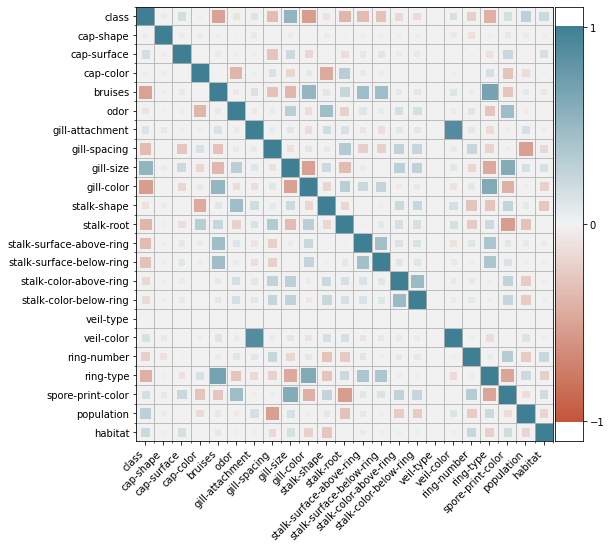

In [26]:
plt.figure(figsize=(8,8))
corrplot(df1.corr(),size_scale=300)

Observations:
    
    Lets take those combinations which are higly correlated to each other through this correlation map and lets analyse those combinations in the bi variate analysis.
    1.Ring type and Bruises
    2.Ring Type and class
    3.Gill spacing and population
    4.Gill attachment and veil colour
    5.Class and gill size
    6.Class and gill attachment
    7.Gill size and spore print color
    8.Spore print color and stalk root
    9.Gill color and ring type
    10.Gill size and Ring type
    
     

# Bi Variate Analysis

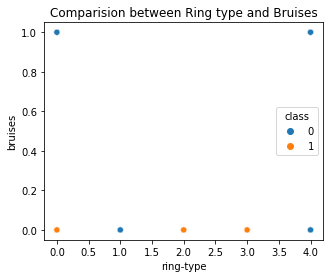

In [27]:
plt.figure(figsize=(5,4))
plt.title('Comparision between Ring type and Bruises')
sns.scatterplot(df1['ring-type'],df1['bruises'],hue=df1['class'])
plt.show()

Observations:

    1.Irrespective of classes in 73% of cases whatever may be the ring-type the bruises feature for that will be of type 0

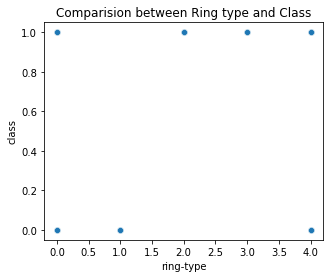

The number of unique values in ringtypes are:  5
Unique elements in ring-type are:
p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64
Unique elements in class are :
e    4208
p    3916
Name: class, dtype: int64


In [28]:
plt.figure(figsize=(5,4))
plt.title('Comparision between Ring type and Class')
sns.scatterplot(df1['ring-type'],df1['class'])
plt.show()
print("The number of unique values in ringtypes are: ",df1['ring-type'].nunique())
print('Unique elements in ring-type are:')
print(df['ring-type'].value_counts())
print('Unique elements in class are :')
print(df['class'].value_counts())

Observations:

    1.From the above representation we can say that if the ring-type is 1(1 means f type) then it wont belong to class 1 (that is p), so we can say that "if the ring-type of the mushroon is f then its edible in general"
    2.From the above representation we can say that if the ring-type is 3(3 means l type) then it wont belong to class 0 (that is e), so we can say that "if the ring-type of the mushroon is l then its poisonous in general"

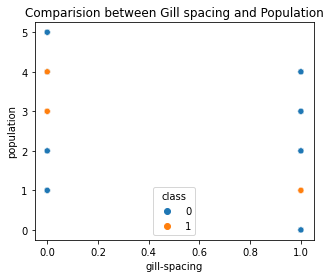

The number of unique values in Gill spacing  are:  2
Unique elements in Gill spacing are:
c    6812
w    1312
Name: gill-spacing, dtype: int64
 The number of unique elements in population are : 6
unique elements in population are:
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64


In [29]:
plt.figure(figsize=(5,4))
plt.title('Comparision between Gill spacing and Population')
sns.scatterplot(df1['gill-spacing'],df1['population'],hue=df1['class'])
plt.show()
print("The number of unique values in Gill spacing  are: ",df['gill-spacing'].nunique())
print('Unique elements in Gill spacing are:')
print(df['gill-spacing'].value_counts())
print(' The number of unique elements in population are :',df['population'].nunique())
print('unique elements in population are:')
print(df['population'].value_counts())

Observations:

1.From the above representation we can say that if the gill spacing is of 'c' catogory then it wont belongs to 'a' category of population.

2.From the above representation we can say that if the gill spacing is of 'w' catagory then it wont belongs to 'y' catagory of the population.

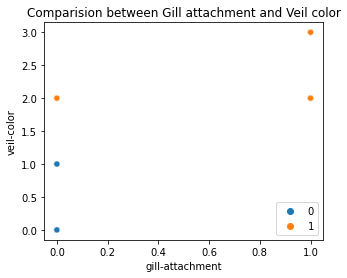

The number of unique values in Gill attachment  are:  2
Unique elements in Gill attachment are:
f    7914
a     210
Name: gill-attachment, dtype: int64
 The number of unique elements in veil-color are : 4
unique elements in veil-color are:
w    7924
o      96
n      96
y       8
Name: veil-color, dtype: int64


In [30]:
plt.figure(figsize=(5,4))
plt.title('Comparision between Gill attachment and Veil color')
sns.scatterplot(df1['gill-attachment'],df1['veil-color'],hue=df1['class'])
plt.legend(loc=4)
plt.show()
print("The number of unique values in Gill attachment  are: ",df['gill-attachment'].nunique())
print('Unique elements in Gill attachment are:')
print(df['gill-attachment'].value_counts())
print(' The number of unique elements in veil-color are :',df['veil-color'].nunique())
print('unique elements in veil-color are:')
print(df['veil-color'].value_counts())

Observations:
    
    1.If the gill attachment is of 'a' type then it wont belongs to 'y' catagory of veil-color
    2.If the gill attachment is of 'f' type then it wont belongs to 'n' and 'o' catagory of veil-color
    3.In most general cases the edible fungus are always belongs to 'n' catagory of gill attachment



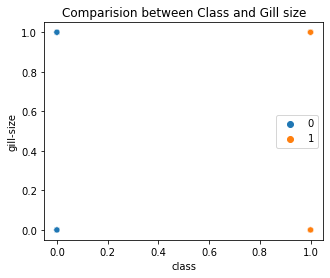

The number of unique values in class  are:  2
Unique elements in class are:
e    4208
p    3916
Name: class, dtype: int64
 The number of unique elements in gill-size are : 2
unique elements in gill-size are:
b    5612
n    2512
Name: gill-size, dtype: int64


In [31]:
plt.figure(figsize=(5,4))
plt.title('Comparision between Class and Gill size')
sns.scatterplot(df1['class'],df1['gill-size'],hue=df1['class'])
plt.legend()
plt.show()
print("The number of unique values in class  are: ",df['class'].nunique())
print('Unique elements in class are:')
print(df['class'].value_counts())
print(' The number of unique elements in gill-size are :',df['gill-size'].nunique())
print('unique elements in gill-size are:')
print(df['gill-size'].value_counts())

Observations:
    
    1.Here based on the gill sizes we cant say whether a mushroom is edible or not 

    

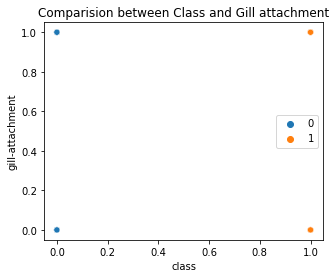

The number of unique values in class  are:  2
Unique elements in class are:
e    4208
p    3916
Name: class, dtype: int64
 The number of unique elements in gill-attachment are : 2
unique elements in gill-attachment are:
f    7914
a     210
Name: gill-attachment, dtype: int64


In [32]:
plt.figure(figsize=(5,4))
plt.title('Comparision between Class and Gill attachment')
sns.scatterplot(df1['class'],df1['gill-attachment'],hue=df1['class'])
plt.legend()
plt.show()
print("The number of unique values in class  are: ",df['class'].nunique())
print('Unique elements in class are:')
print(df['class'].value_counts())
print(' The number of unique elements in gill-attachment are :',df['gill-attachment'].nunique())
print('unique elements in gill-attachment are:')
print(df['gill-attachment'].value_counts())

Observations:

    1.Here based on the gill attachment we cant say whether a mushroom is edible or not
    



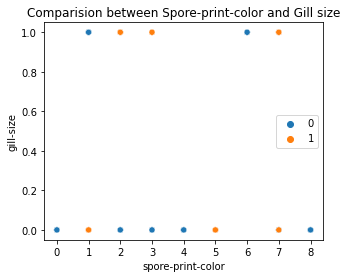

The number of unique values in spore-print-color  are:  9
Unique elements in spore-print-color are:
w    2388
n    1968
k    1872
h    1632
r      72
u      48
b      48
y      48
o      48
Name: spore-print-color, dtype: int64
 The number of unique elements in gill-size are : 2
unique elements in gill-size are:
b    5612
n    2512
Name: gill-size, dtype: int64


In [33]:
plt.figure(figsize=(5,4))
plt.title('Comparision between Spore-print-color and Gill size')
sns.scatterplot(df1['spore-print-color'],df1['gill-size'],hue=df1['class'])
plt.legend()
plt.show()
print("The number of unique values in spore-print-color  are: ",df['spore-print-color'].nunique())
print('Unique elements in spore-print-color are:')
print(df['spore-print-color'].value_counts())
print(' The number of unique elements in gill-size are :',df['gill-size'].nunique())
print('unique elements in gill-size are:')
print(df['gill-size'].value_counts())

Observations:
    
    1.The following combinations of spore print color and gill size categories are edible:
        gill size         spore print color
        1.b                    b              edible
        2.n                    h              edible
        3.b                    k              edible
        4.b                    n              edible
        5.b                    o              edible
        6.n                    u              edible
        7.b                    y              edible

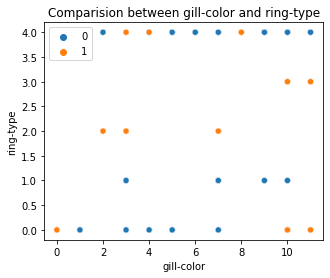

The number of unique values in gill-color  are:  12
Unique elements in gill-color are:
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
 The number of unique elements in ring-type are : 5
unique elements in ring-type are:
p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64


In [34]:
plt.figure(figsize=(5,4))
plt.title('Comparision between gill-color and ring-type')
sns.scatterplot(df1['gill-color'],df1['ring-type'],hue=df1['class'])
plt.legend()
plt.show()
print("The number of unique values in gill-color  are: ",df['gill-color'].nunique())
print('Unique elements in gill-color are:')
print(df['gill-color'].value_counts())
print(' The number of unique elements in ring-type are :',df['ring-type'].nunique())
print('unique elements in ring-type are:')
print(df['ring-type'].value_counts())

Observations:
    
    1.Here there are combinations which are edible:
        gill-color         ring-type  
        1.e                 e            edible
        2.g                 p            edible
        3.h                 e            edible
        4.h                 f            edible
        5.k                 e            edible
        6.n                 e            edible
        7.n                 p            edible
        8.o                 p            edible
        9.p                 e            edible
       10.p                 f            edible
       11.p                 p            edible
       12.u                 f            edible
       13.u                 p            edible
       14.w                 f            edible
       15.w                 p            edible
       16.y                 p            edible

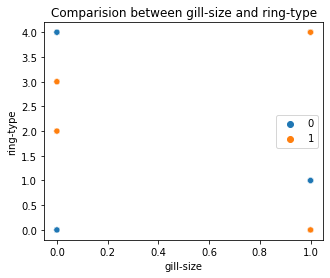

The number of unique values in gill-size  are:  2
Unique elements in gill-size are:
b    5612
n    2512
Name: gill-size, dtype: int64
 The number of unique elements in ring-type are : 5
unique elements in ring-type are:
p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64


In [35]:
plt.figure(figsize=(5,4))
plt.title('Comparision between gill-size and ring-type')
sns.scatterplot(df1['gill-size'],df1['ring-type'],hue=df1['class'])
plt.legend(loc='best')
plt.show()
print("The number of unique values in gill-size  are: ",df['gill-size'].nunique())
print('Unique elements in gill-size are:')
print(df['gill-size'].value_counts())
print(' The number of unique elements in ring-type are :',df['ring-type'].nunique())
print('unique elements in ring-type are:')
print(df['ring-type'].value_counts())

Observations:
    
    gill-size       ring-type
    1.b                e           edible
    2.b                p           edible
    3.n                f           edible

# Data cleaning

In [36]:
df1.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [37]:
#its better to see for unique values in df rather than df1 since its label encoded

In [38]:
for i in df:
    print('Name of the column is :',i)
    print('unique values are :')
    print(df[i].value_counts())
    print('\n')

Name of the column is : class
unique values are :
e    4208
p    3916
Name: class, dtype: int64


Name of the column is : cap-shape
unique values are :
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


Name of the column is : cap-surface
unique values are :
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


Name of the column is : cap-color
unique values are :
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64


Name of the column is : bruises
unique values are :
f    4748
t    3376
Name: bruises, dtype: int64


Name of the column is : odor
unique values are :
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64


Name of the column is : gill-attachment
unique values are :
f    7914
a     210
Name: gill-attachment, dtype: int64


Name of the column is : gill-spacing
unique values are

In [39]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [40]:
df1['stalk-root'].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

In [41]:
df1['stalk-root'].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

In [42]:
df1['stalk-root'].replace(0,1,inplace=True)

In [43]:
df1['stalk-root'].value_counts()

1    6256
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

In [44]:
df['stalk-root'].replace('?','b',inplace=True)

In [45]:
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [46]:
#data is been cleaned and no need to check for skewness or zscore values because all the columns are catagorical

# Building the Models

In [47]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [48]:
x=df1.drop('class',axis=1)

In [49]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [50]:
y=df1['class']

In [51]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [52]:
print('The shape of the x is ',x.shape)

The shape of the x is  (8124, 22)


In [53]:
print('The shape of the y is ',y.shape)

The shape of the y is  (8124,)


In [54]:
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=43)

In [56]:
print('x_train shape is :',x_train.shape)
print('\n')
print('x_test shape is :',x_test.shape)
print('\n')
print('y_train shape is :',y_train.shape)
print('\n')
print('y_test shape is :',y_test.shape)

x_train shape is : (6255, 22)


x_test shape is : (1869, 22)


y_train shape is : (6255,)


y_test shape is : (1869,)


Observations:
    
    1.Everything is fine

In [57]:
#Finding the best random state

In [58]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    mod=svc
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.9957196361690743 on random state 82


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=82)

In [60]:
models=[gnb,svc,dtc,knn,add,rf]
for m in models:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of',m)
    print(round((accuracy_score(y_test,pred)),3))
    print('\n')

accuracy score of GaussianNB()
0.903


accuracy score of SVC()
0.996


accuracy score of DecisionTreeClassifier()
1.0


accuracy score of KNeighborsClassifier()
0.999


accuracy score of AdaBoostClassifier()
1.0


accuracy score of RandomForestClassifier()
1.0




In [61]:
models=[gnb,svc,dtc,knn,add,rf]
for m in models:
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

GaussianNB() score is:
0.729


SVC() score is:
0.847


DecisionTreeClassifier() score is:
0.907


KNeighborsClassifier() score is:
0.883


AdaBoostClassifier() score is:
0.917


RandomForestClassifier() score is:
0.891




Observations:
    
    The differencr of accuracy score and cross val score is as follows
    1.GaussianNB =0.174
    2.SVC        =0.149
    3.dtc        =0.08
    4.knn        =0.116
    5.add        =0.083
    6.rf         =0.101
    
    since DecisionTreeClassifier has less difference so it is used to build the best model

# Hyper parameter tuning

In [62]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,5)
}

gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9280885183781736


In [65]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=2,min_samples_leaf=1)
dtc.fit(x,y)
dtc.score(x,y)

1.0

In [67]:
import joblib
joblib.dump(dtc,'dtcmodel.obj')

['dtcmodel.obj']